<a href="https://colab.research.google.com/github/Rohawaseem/Task-2/blob/main/Week6_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('twitter_sentiment_200.csv')
df.head()


Saving twitter_sentiment_200.csv to twitter_sentiment_200.csv


,Tweet ID,Username,Tweet Text,Retweets,Favorites,Followers,Timestamp,Sentiment
0,05a72860-7fbf-4565-a43c-961b732f0240,samanthagillespie,Talk get bag focus pattern necessary. Step com...,81,14,409,2022-11-07 18:49:55.793691,Neutral
1,0c3735c8-3d67-4c50-b639-14010e918d31,rfisher,Front measure modern design. Policy go start f...,35,31,3657,2023-01-21 21:51:43.768392,Positive
2,044365c9-0e4a-46ce-9a00-1e5d184ec5b7,bgarcia,Lead which daughter join. Yeah world sort pers...,94,13,8935,2021-07-09 06:55:03.007612,Positive
3,f37cc2c8-4ebf-483b-a970-ef9c2e0f4d37,robert13,Morning first receive. Special land oil.\nWond...,75,54,520,2022-09-28 21:08:48.969174,Positive
4,c78dd47e-df0d-47ff-9c29-de9287a96429,erinwalker,Artist church ago. Gun hold bank plan natural ...,11,27,3811,2020-04-03 21:17:33.227220,Neutral


In [3]:
# Convert Sentiment to numeric labels
df['SentimentCode'] = df['Sentiment'].astype('category').cat.codes

# Select features (inputs)
X = df[['Retweets', 'Favorites', 'Followers']]

# Target variable
y = df['SentimentCode']

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Evaluate
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)


Logistic Regression Accuracy: 0.4


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)


Random Forest Accuracy: 0.375


In [6]:
print("\n--- Model Comparison ---")
print("Logistic Regression Accuracy:", acc_log)
print("Random Forest Accuracy:", acc_rf)

if acc_rf > acc_log:
    print("✅ Random Forest performs better.")
else:
    print("✅ Logistic Regression performs better.")



--- Model Comparison ---
Logistic Regression Accuracy: 0.4
Random Forest Accuracy: 0.375
✅ Logistic Regression performs better.


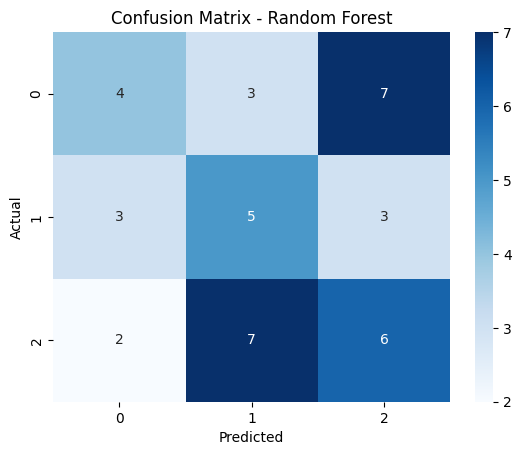

In [7]:
# Confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
